In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as rep,confusion_matrix as cm

data=pd.read_csv("/content/Diabetes Patients Dataset.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
data.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')

In [0]:
data.corr()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
Number of times pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Diastolic blood pressure (mm Hg),0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Triceps skin fold thickness (mm),-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
2-Hour serum insulin (mu U/ml),-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Body mass index (weight in kg/(height in m)^2),0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age (years),0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class variable (0 or 1),0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


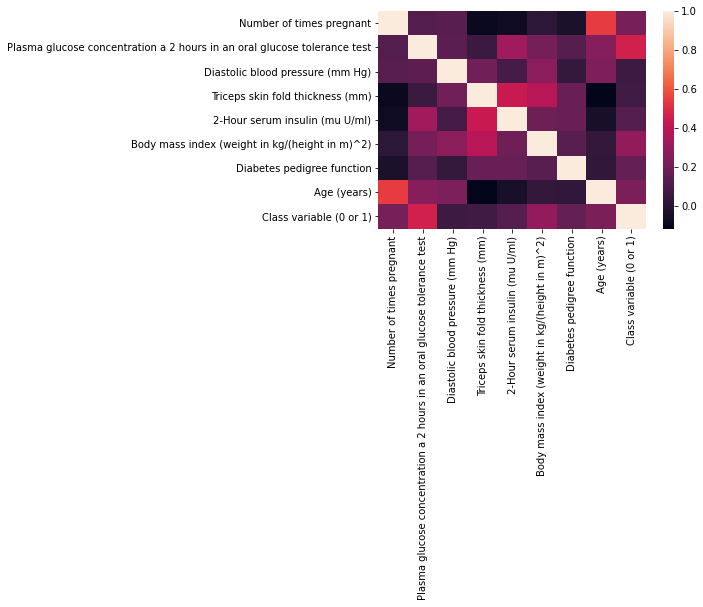

In [0]:
sns.heatmap(data.corr())

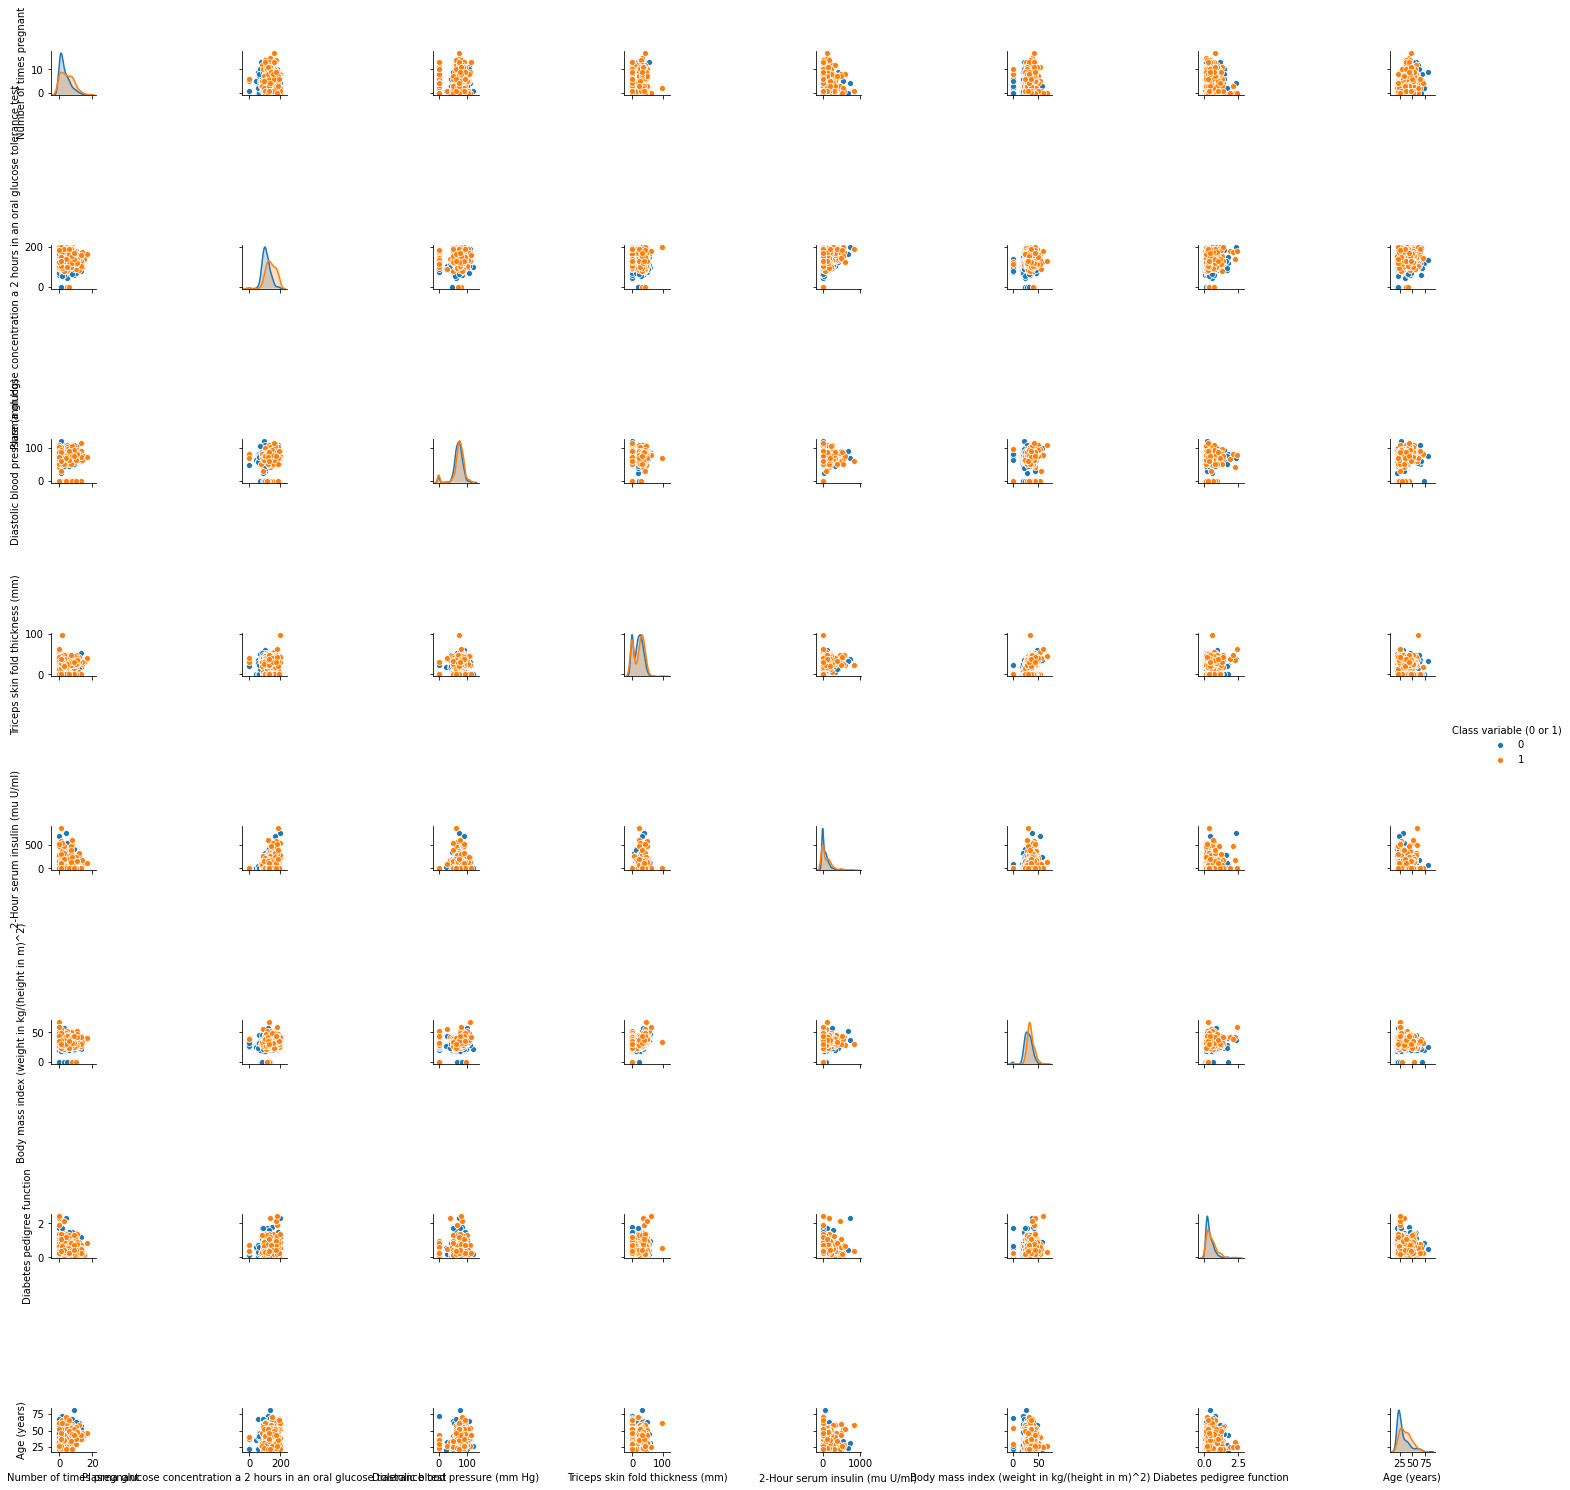

In [0]:
sns.pairplot(data,hue="Class variable (0 or 1)",vars=['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)'])

In [0]:
#Select independent and dependent variables
y= data['Class variable (0 or 1)']
x=data.drop(columns=['Class variable (0 or 1)'])

In [0]:
# perform normalisation in indeoendent variables
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
Xnorm=scale.fit_transform(x)
print(" normalised data using standarisation ", Xnorm)

 normalised data using standarisation  [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [0]:
#Splitting the variables into into test and training sets
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(Xnorm,y,test_size = 0.1,random_state=0)

In [0]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

classifier_lr = LinearRegression()
classifier_lr.fit(x_train,y_train)
y_lr_pred = classifier_lr.predict(x_test)

#Result

classifier_lr.score(x_test,y_test)*100

34.68733150146846

In [0]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() 
log_model.fit(x_train, y_train) 
y_pred_log = log_model.predict(x_test) 
   
  
log_model.score(x_test, y_pred_log)*100 

100.0

In [0]:
# XG Boost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
y_pred_xg = xgboost_model.predict(x_test)

xgboost_model.score(x_test , y_pred_xg)*100

100.0

In [0]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

gb_model.score(x_test , y_pred_gb)*100

100.0

In [0]:
#Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(x_train, y_train)
y_naive_pred = classifier_naive.predict(x_test)

#Accuracy

classifier_naive.score(x_test,y_test)*100

80.51948051948052

In [0]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier_rfc = RandomForestClassifier(n_estimators=20, random_state=0)
classifier_rfc.fit(x_train, y_train)
y_rfc_pred = classifier_rfc.predict(x_test)

#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_rfc_pred)*100

80.51948051948052

In [0]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_dtc_pred = classifier_dtc.predict(x_test)

#accuracy
accuracy_score(y_test,y_dtc_pred)*100

76.62337662337663

In [0]:
#Simple Support Vector Classification

from sklearn.svm import SVC

classifier_svm = SVC()
classifier_svm.fit(x_train, y_train)
y_svm_pred = classifier_svm.predict(x_test)

#Accuracy
classifier_svm.score(x_test,y_test) *100

83.11688311688312

In [0]:
#Kernel Support Vector Classification

from sklearn.svm import SVC

classifier_svc = SVC(kernel='linear',random_state=0)
classifier_svc.fit(x_train,y_train)
y_svc_pred = classifier_svc.predict(x_test)

#accuracy
classifier_svc.score(x_test,y_test)*100

87.01298701298701

In [0]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

classifier_sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=0)
classifier_sgd.fit(x_train,y_train)
y_sgd_pred = classifier_sgd.predict(x_test)

#accuracy
accuracy_score(y_test,y_sgd_pred)*100

61.038961038961034

In [0]:
#Results of the classifications

con_log = cm(y_test,y_pred_log)
con_xg = cm(y_test,y_pred_xg)
con_gb = cm(y_test,y_pred_gb)
con_naive = cm(y_test,y_naive_pred)
con_rfc = cm(y_test,y_rfc_pred)
con_dtc = cm(y_test,y_dtc_pred)
con_svm = cm(y_test,y_svm_pred)
con_svc = cm(y_test,y_svc_pred)
con_sgd = cm(y_test,y_sgd_pred)


print("LOGISTIC REGRESSION MODEL\n",rep(y_test,y_pred_log),"\n", con_log ,"\n")
print("XG BOOST\n",rep(y_test,y_pred_xg),"\n", con_xg ,"\n")
print("GRADIENT BOOSTING CLASSIFIER\n",rep(y_test,y_pred_gb),"\n", con_gb ,"\n")
print("NAIVE BAYES RESULTS\n",rep(y_test,y_naive_pred),"\n", con_naive ,"\n")
print("RANDOM FOREST CLASSIFIER RESULTS\n",rep(y_test,y_rfc_pred),"\n" , con_rfc, "\n")
print("DECISION TREE RESULTS\n",rep(y_test,y_dtc_pred),"\n" , con_dtc , "\n")
print("SIMPLE SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svm_pred),"\n", con_svm , "\n")
print("KERNEL SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svc_pred),"\n", con_svc , "\n")
print("STOCHASTIC GRADIENT DESCENT RESULTS\n",rep(y_test,y_sgd_pred),"\n", con_sgd , "\n")

LOGISTIC REGRESSION MODEL
               precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77
 
 [[48  3]
 [ 7 19]] 

XG BOOST
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        51
           1       0.67      0.69      0.68        26

    accuracy                           0.78        77
   macro avg       0.75      0.76      0.76        77
weighted avg       0.78      0.78      0.78        77
 
 [[42  9]
 [ 8 18]] 

GRADIENT BOOSTING CLASSIFIER
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        51
           1       0.69      0.69      0.69        26

    accuracy                           0.79        77
   macro avg   

In [0]:
predicted_class= classifier_svc.predict(x)
data['Predicted Class variable (0 or 1)']= predicted_class
data[['Class variable (0 or 1)','Predicted Class variable (0 or 1)']]

,Class variable (0 or 1),Predicted Class variable (0 or 1)
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
763,0,1
764,0,1
765,0,1
766,1,1


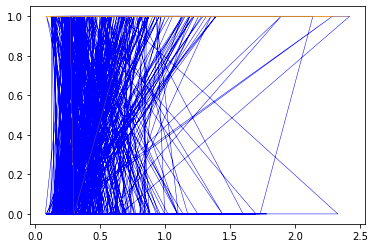

In [0]:
plt.plot(data['Diabetes pedigree function'], data['Class variable (0 or 1)'], color="blue" , linewidth="0.5")
plt.plot(data['Diabetes pedigree function'], data['Predicted Class variable (0 or 1)'] , color="orange" , linewidth="0.2")

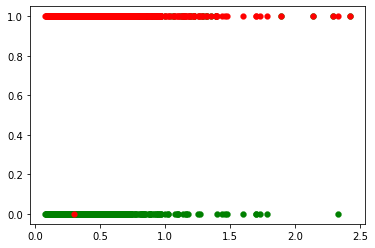

In [0]:
plt.scatter(data['Diabetes pedigree function'], data['Class variable (0 or 1)'], color="green" , linewidth="0.3")
plt.scatter(data['Diabetes pedigree function'], data['Predicted Class variable (0 or 1)'] , color="red" , linewidth="0.2")